In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pandas as pd, pcmdpy as ppy
from astropy.io import fits
from tqdm import tqdm
%matplotlib inline

GPU acceleration enabled


In [2]:
ppy.gpu_utils.initialize_gpu(n=0)

using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [3]:
plt.style.use('seaborn-poster')

In [4]:
f = ppy.instrument.default_m49_filters()

In [5]:
iso_model = ppy.isochrones.Isochrone_Model(f)

In [6]:
driv = ppy.driver.Driver(iso_model, gpu=True)

In [243]:
pcmd_m49 = np.loadtxt('../data/m49/pcmds/m49_t23_z-gz.pcmd', unpack=True)

In [244]:
bins = [np.arange(1, 3, 0.05), np.arange(23, 26, 0.05)]


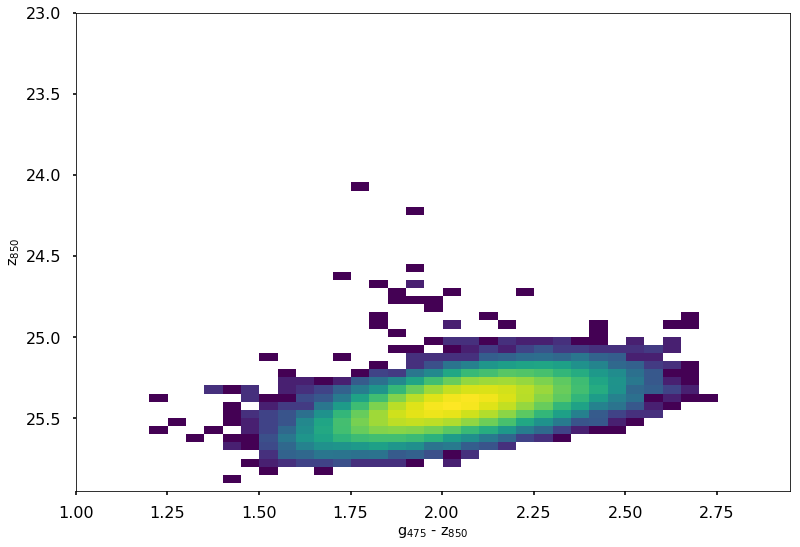

In [245]:
fig, ax = plt.subplots()
ax.hist2d(pcmd_m49[1], pcmd_m49[0], bins=bins, norm=mpl.colors.LogNorm());
ppy.plotting.plot_isochrone(iso_model, dmod=31.3, axes=ax)

In [246]:
dmod_m49 = 31.3

In [247]:
gal_m49 = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.agemodels.TauModel(),
    ppy.distancemodels.VariableDistance()
)

In [248]:
sky_m49 = np.array([30.0, 27.6])*1.

In [399]:
base_params = np.array([0., -1.5, 4.65, 1.5, 31.3])

In [400]:
%%time
gal_m49.set_params(base_params)
pcmd_baseline = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 830 ms, sys: 176 ms, total: 1.01 s
Wall time: 1.75 s


In [401]:
%%time
gal_m49.set_params(base_params + np.array([0.5, 0., 0., 0., 0.]))
pcmd_1 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 825 ms, sys: 182 ms, total: 1.01 s
Wall time: 1.48 s


In [402]:
%%time
gal_m49.set_params(base_params + np.array([-0.5, 0., 0., 0., 0.]))
pcmd_2 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 820 ms, sys: 178 ms, total: 998 ms
Wall time: 1.46 s


In [403]:
%%time
gal_m49.set_params(base_params + np.array([0., 0.5, 0., 0., 0.]))
pcmd_3 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 820 ms, sys: 198 ms, total: 1.02 s
Wall time: 1.57 s


In [404]:
%%time
gal_m49.set_params(base_params + np.array([0., -0.5, 0., 0., 0.]))
pcmd_4 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 820 ms, sys: 181 ms, total: 1 s
Wall time: 1.47 s


In [405]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., 0.5, 0., 0.]))
pcmd_5 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 817 ms, sys: 178 ms, total: 995 ms
Wall time: 1.51 s


In [406]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., -0.5, 0., 0.]))
pcmd_6 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 814 ms, sys: 170 ms, total: 984 ms
Wall time: 1.48 s


In [407]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., 0., 1., 0.]))
pcmd_7 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 822 ms, sys: 191 ms, total: 1.01 s
Wall time: 1.48 s


In [408]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., 0., -1., 0.]))
pcmd_8 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 818 ms, sys: 178 ms, total: 997 ms
Wall time: 1.47 s


In [409]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., 0., 0., 1.]))
pcmd_9 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 837 ms, sys: 171 ms, total: 1.01 s
Wall time: 1.47 s


In [410]:
%%time
gal_m49.set_params(base_params + np.array([0., 0., 0., 0., -1.]))
pcmd_10 = driv.simulate(gal_m49, 512, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 811 ms, sys: 185 ms, total: 997 ms
Wall time: 1.48 s


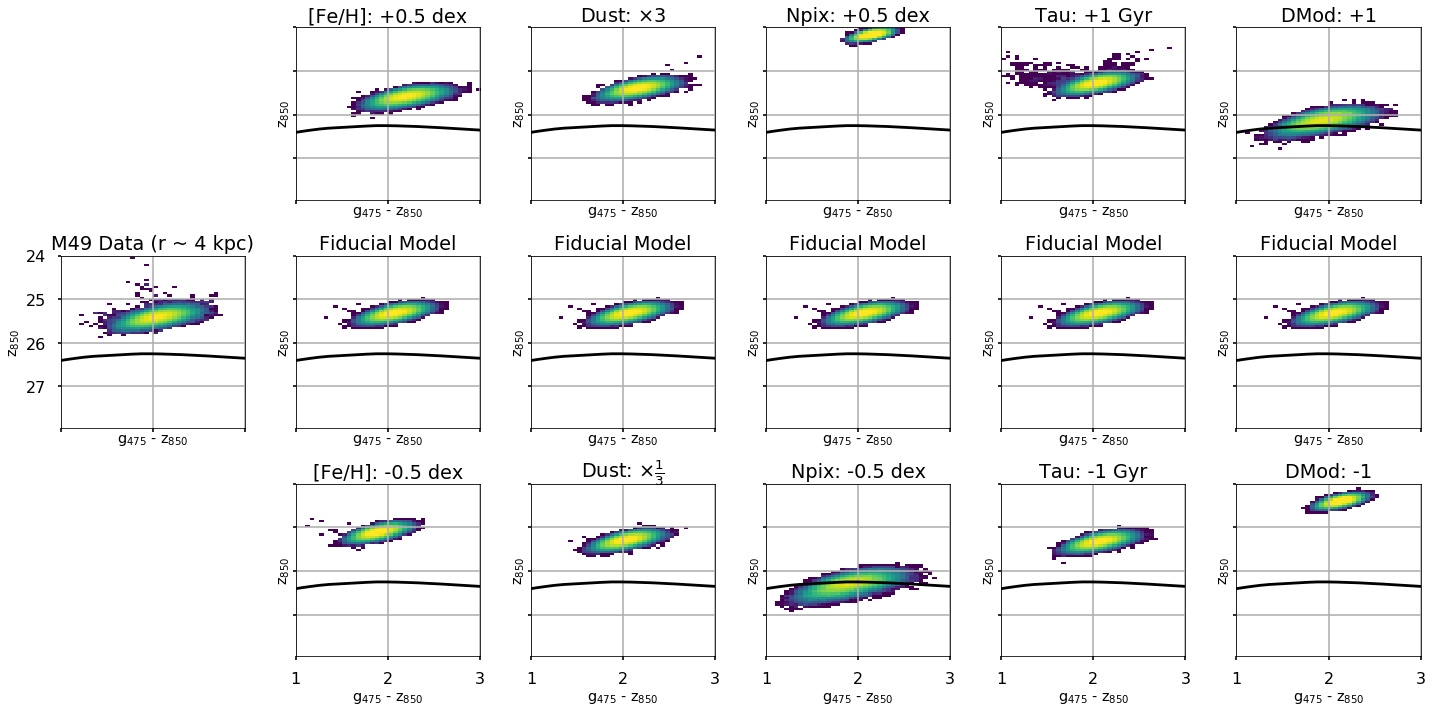

In [412]:
bins = [np.arange(1, 3.05, 0.05), np.arange(24, 28, 0.05)]
n = mpl.colors.LogNorm()

fig, axes = plt.subplots(ncols=6, nrows=3, figsize=(20, 10), sharex=True, sharey=True)
for ax in [axes[0,0], axes[2,0]]:
    ax.axis('off')
ax = axes[1,0]
ppy.plotting.plot_isochrone(iso_model, dmod=dmod_m49, axes=ax)
ax.hist2d(pcmd_m49[1], pcmd_m49[0], bins=bins, norm=n, normed=True)
ax.set_title('M49 Data (r ~ 4 kpc)')

pcmd = pcmd_baseline
for ax in axes[1,1:]:
    ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
    ax.set_title('Fiducial Model')

# vary [Fe/H]
ax = axes[0, 1]
pcmd = pcmd_1
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title('[Fe/H]: +0.5 dex')

ax = axes[2, 1]
pcmd = pcmd_2
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title('[Fe/H]: -0.5 dex')

# vary Dust
ax = axes[0, 2]
pcmd = pcmd_3
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Dust: $\times3$')

ax = axes[2, 2]
pcmd = pcmd_4
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Dust: $\times\frac{1}{3}$')

# vary Npix
ax = axes[0, 3]
pcmd = pcmd_5
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Npix: +0.5 dex')

ax = axes[2, 3]
pcmd = pcmd_6
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Npix: -0.5 dex')

# vary Tau
ax = axes[0, 4]
pcmd = pcmd_7
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Tau: +1 Gyr')

ax = axes[2, 4]
pcmd = pcmd_8
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'Tau: -1 Gyr')

# vary Dmod
ax = axes[0, 5]
pcmd = pcmd_9
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'DMod: +1')

ax = axes[2, 5]
pcmd = pcmd_10
ax.hist2d(pcmd[1], pcmd[0], bins=bins, norm=n, normed=True)
ax.set_title(r'DMod: -1')

for ax in axes[:,1:].flatten():
    ppy.plotting.plot_isochrone(iso_model, dmod=dmod_m49, axes=ax)
for ax in axes.flatten():
    ax.grid(True)
plt.tight_layout()
plt.savefig('figures/m49_model_grid.pdf')

In [425]:
f[0]._exposure = 560. * 2.
f[1]._exposure = 375. * 2.

In [426]:
base_params = np.array([0., -1.5, 6., 1.5, 30.])
bins = bins = [np.arange(1, 3, 0.05), np.arange(20.5, 21, 0.05)]

In [427]:
%%time
gal_m49.set_params(base_params)
pcmd_baseline = driv.simulate(gal_m49, 2048, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 7.43 s, sys: 2.49 s, total: 9.92 s
Wall time: 10.7 s


In [428]:
%%time
d_dist = 2
gal_m49.set_params(base_params + np.array([0., 0., 0.4*d_dist, 0., d_dist]))
pcmd_far = driv.simulate(gal_m49, 2048, downsample=5, shot_noise=True, sky_noise=sky_m49)[0]

CPU times: user 7.47 s, sys: 2.65 s, total: 10.1 s
Wall time: 10.6 s


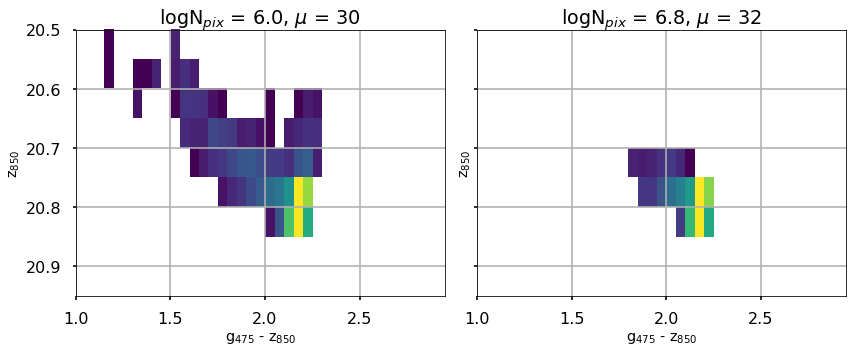

In [429]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

n = mpl.colors.LogNorm()

axes[0].hist2d(pcmd_baseline[1], pcmd_baseline[0], bins=bins, norm=n, normed=True)
axes[0].set_title(r'$\log \mathrm{N}_{pix} $ = 6.0, $\mu$ = 30')
axes[1].hist2d(pcmd_far[1], pcmd_far[0], bins=bins, norm=n, normed=True)
axes[1].set_title(r'$\log \mathrm{N}_{pix} $ = 6.8, $\mu$ = 32')

for ax in axes:
    ppy.plotting.plot_isochrone(iso_model, dmod=dmod_m49, axes=ax)
    ax.grid(True)
plt.tight_layout()
plt.savefig('figures/m49_distance_npix.pdf')